## Cluster Interpretation & Business Insights

The objective of this notebook is to analyze and interpret the customer segments
generated by the clustering model. Each cluster is profiled based on RFM metrics to translate them into actionable
business insights.


In [6]:
from pathlib import Path

FIGURES_PATH = Path("../reports/figures")
FIGURES_PATH.mkdir(parents=True, exist_ok=True)


In [1]:
import pandas as pd

rfm=pd.read_csv("../data/processed/customer_segments.csv")
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12747.0,2,11,3073.41,3
1,12748.0,1,203,26279.22,2
2,12749.0,4,5,4032.98,1
3,12820.0,3,4,923.62,1
4,12821.0,214,1,92.72,0


In [2]:
cluster_profile=(
  rfm
  .groupby("Cluster")[["Recency","Frequency","Monetary"]]
  .mean()
  .round(1)
)
cluster_profile

,Recency,Frequency,Monetary
Cluster,,,
0,244.6,1.5,368.0
1,43.8,3.4,927.0
2,2.9,93.7,32823.7
3,14.7,17.3,5543.2


### Normalize the RFM features (Z-Score)

In [3]:
cluster_profile_norm=(
  cluster_profile - cluster_profile.mean()
)/ cluster_profile.std()

cluster_profile_norm

,Recency,Frequency,Monetary
Cluster,,,
0,1.482663,-0.628416,-0.618070
1,-0.288418,-0.584959,-0.581883
2,-0.649161,1.480409,1.482999
3,-0.545084,-0.267034,-0.283046


### Implement Radar Chart

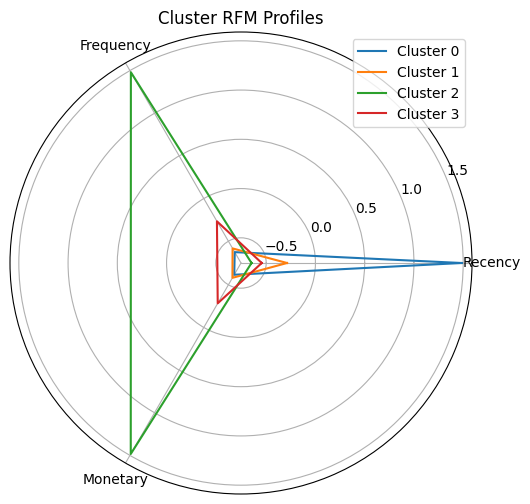

In [7]:
import matplotlib.pyplot as plt
import numpy as np

labels = cluster_profile_norm.columns
num_labels = len(labels)

angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(6,6))

for cluster in cluster_profile_norm.index:
    values = cluster_profile_norm.loc[cluster].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f"Cluster {cluster}")

plt.xticks(angles[:-1], labels)
plt.title("Cluster RFM Profiles")
plt.legend(loc="upper right")
plt.savefig(FIGURES_PATH/"Radar_Chart.png",dpi=300,bbox_inches="tight")
plt.show()


###  Cluster Interpretation

###  Cluster 2 — VIP Customers  
This cluster represents the most valuable customers in the business. They purchase **frequently**, generate **high monetary value**, and have **low recency**, meaning they have bought very recently. These customers are highly engaged, loyal, and contribute disproportionately to total revenue. Retaining this segment is critical, as losing even a small number of VIP customers can significantly impact business performance.

---

###  Cluster 3 — New / Potential Loyalists  
Customers in this cluster show **above-average purchase frequency** and relatively recent activity, indicating growing engagement with the brand. While their total spending has not yet reached VIP levels, their behavior suggests strong potential to become loyal, high-value customers if nurtured correctly. This segment is important for future revenue growth.

---

###  Cluster 1 — Occasional Shoppers  
This is the largest customer segment and represents customers who purchase **infrequently** and spend **relatively low amounts**. Their recency, frequency, and monetary values are around the dataset average. These customers are not strongly loyal but are still active, making them a key target for engagement strategies aimed at increasing purchase frequency and basket size.

---

###  Cluster 0 — Lost / Churned Customers  
This cluster consists of customers with **high recency**, meaning they have not made purchases for a long time, combined with **low frequency** and **low monetary value**. These customers are likely churned or at high risk of churn. While some may be reactivated through targeted campaigns, others may no longer be cost-effective to pursue.

---


In [13]:
customer_distribution=(rfm["Cluster"].value_counts(normalize=True)*100).round(1)
customer_distribution

Cluster
1    67.7
0    25.1
3     7.0
2     0.2
Name: proportion, dtype: float64

##  Customer Distribution Across Clusters

The distribution of customers across clusters reveals clear behavioral patterns within the business:

- **Occasional Shoppers (Cluster 1)** dominate the customer base, accounting for **67.7%** of all customers. This indicates a large segment with untapped potential for increased engagement.
- **Lost / Churned Customers (Cluster 0)** make up **25.1%**, highlighting a significant churn risk that the business should actively address.
- **New / Potential Loyalists (Cluster 3)** represent **7.0%** of customers, forming a promising growth segment.
- **VIP Customers (Cluster 2)** account for only **0.2%**, yet they are likely responsible for a substantial share of total revenue despite their small size.


## Business Recomedation

###  VIP Customers (Cluster 2)
- Introduce exclusive loyalty programs, early access to products, and personalized offers.
- Provide premium customer support to strengthen long-term retention.
- Monitor churn signals closely, as losing these customers has high revenue impact.

---

###  New / Potential Loyalists (Cluster 3)
- Use targeted promotions, personalized recommendations, and onboarding campaigns.
- Encourage repeat purchases through discounts on second or third orders.
- Gradually introduce loyalty incentives to move them toward the VIP segment.

---

###  Occasional Shoppers (Cluster 1)
- Launch engagement campaigns such as limited-time offers and email reminders.
- Use product bundles or cross-selling strategies to increase monetary value.
- Analyze barriers preventing higher purchase frequency.

---

###  Lost / Churned Customers (Cluster 0)
- Run win-back campaigns with strong incentives (e.g., special discounts).
- Identify churn drivers by analyzing past behavior and purchase history.
- Focus marketing budget selectively, as not all customers in this cluster may be recoverable.

